**Covid-19 in Italy. Cases incidence per 100.000 people by region**

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import AnchoredText

from custom.plot_utils import get_xticks_labels

**Read the csv file provided by Protezione Civile**

- data (index)
- codice_regione = region code
- denominazione_regione = region name
- casi_testati = tested cases (cumulative sum)
- totale_casi = total cases (cumulative sum)

In [2]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
date_parser = lambda x: pd.to_datetime(x, infer_datetime_format=True)
columns = ["data", "codice_regione", "denominazione_regione", "casi_testati", "totale_casi"]
df = pd.read_csv(url,
                 usecols=columns,
                 parse_dates=["data"],
                 date_parser=date_parser,
                 index_col="data")
df = df[df.index >= "2021/09/01"]
df.tail()

,codice_regione,denominazione_regione,totale_casi,casi_testati
data,,,,
2022-01-01 17:00:00,19,Sicilia,378368,3038206.0
2022-01-01 17:00:00,9,Toscana,396593,3677834.0
2022-01-01 17:00:00,10,Umbria,92680,537764.0
2022-01-01 17:00:00,2,Valle d'Aosta,16574,111003.0
2022-01-01 17:00:00,5,Veneto,659993,2469045.0


**Get regional codes/names**

In [3]:
codes = df["codice_regione"].unique()
regions = df["denominazione_regione"].unique()
reg_dict = dict(zip(codes, regions))
reg_dict

{13: 'Abruzzo',
 17: 'Basilicata',
 18: 'Calabria',
 15: 'Campania',
 8: 'Emilia-Romagna',
 6: 'Friuli Venezia Giulia',
 12: 'Lazio',
 7: 'Liguria',
 3: 'Lombardia',
 11: 'Marche',
 14: 'Molise',
 21: 'P.A. Bolzano',
 22: 'P.A. Trento',
 1: 'Piemonte',
 16: 'Puglia',
 20: 'Sardegna',
 19: 'Sicilia',
 9: 'Toscana',
 10: 'Umbria',
 2: "Valle d'Aosta",
 5: 'Veneto'}

**Get demographic data**

In [4]:
# Read demographic data from the government repository
demo_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-statistici-riferimento/popolazione-istat-regione-range.csv"
df_demo = pd.read_csv(demo_url)
df_demo.tail()

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
205,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,50-59,399024,400436,799460
206,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,60-69,293238,309972,603210
207,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,70-79,228669,265774,494443
208,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,80-89,115439,177591,293030
209,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,90+,16430,49080,65510


**Plot Covid-19 cases per 100.000, 7-day period**

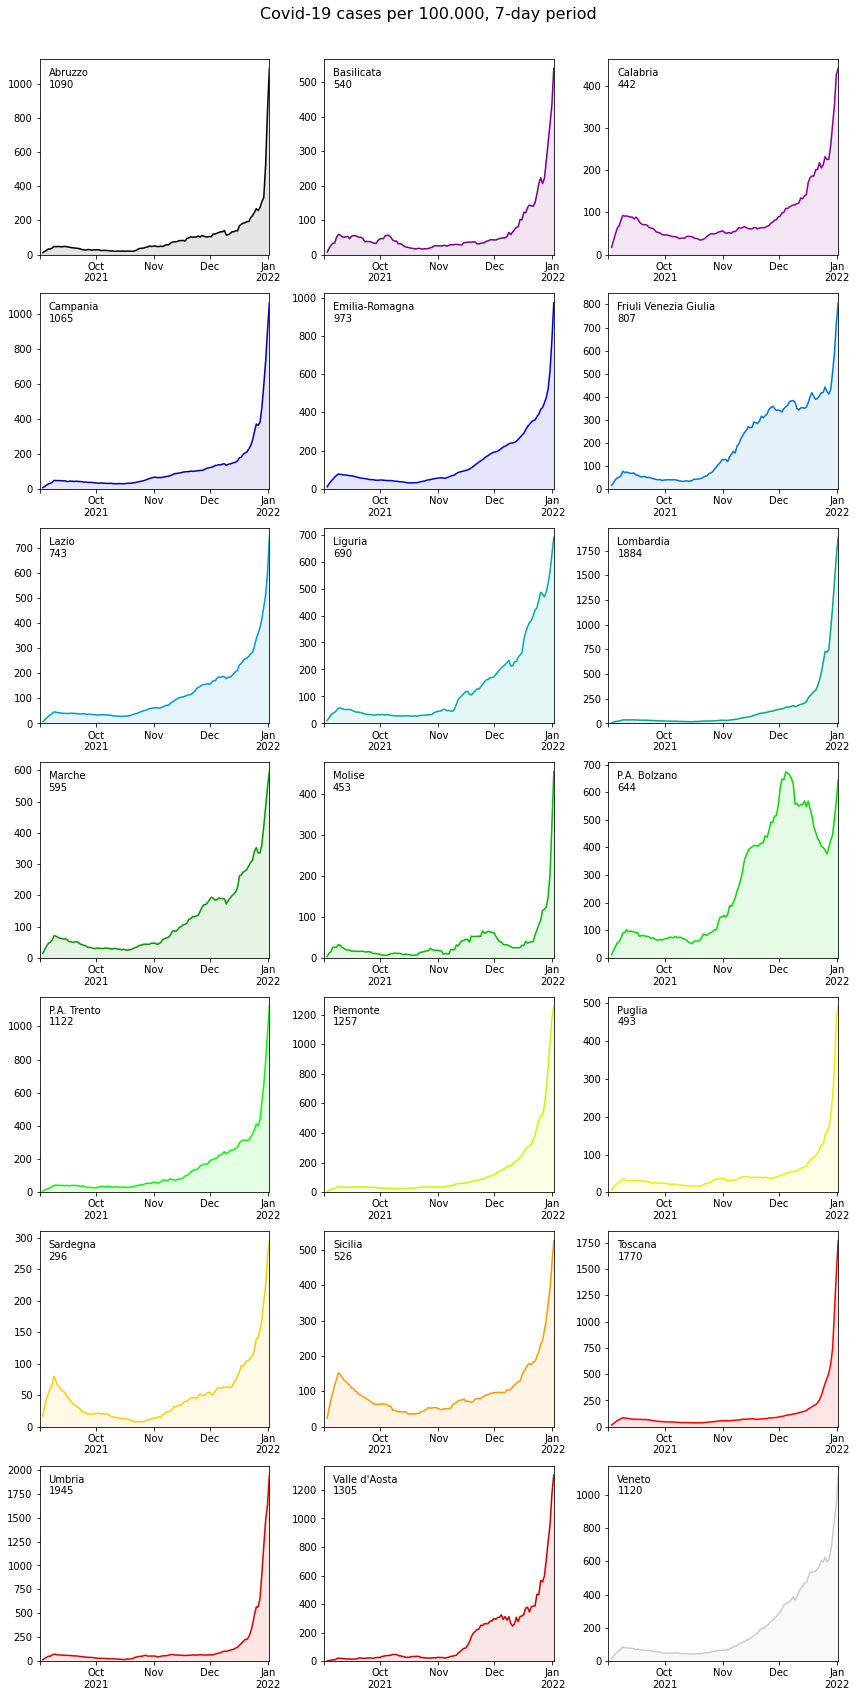

In [5]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(12,24))
fig.suptitle("Covid-19 cases per 100.000, 7-day period", fontsize=16)
axes = ax.ravel()

cmap =  plt.cm.get_cmap("nipy_spectral", 21)

for i, (code, region) in enumerate(reg_dict.items()):
      df_ = df[df["codice_regione"]==code]["totale_casi"].diff()
      pop = df_demo[df_demo["codice_regione"]==code]["totale_generale"].sum()
      rate = df_.rolling(window=7, min_periods=1).sum()/pop*10**5

      color = c=cmap(i)
      axes[i].plot(df_.index, rate, c=color)
      axes[i].fill_between(x=df_.index, y1=rate, color=color, alpha=0.10)
      
      axes[i].margins(x=0)
      axes[i].set_ylim(0, )

      ticks, labels = get_xticks_labels(df_.index)
      axes[i].set_xticks(ticks)
      axes[i].set_xticklabels(labels)

      at = AnchoredText(f"{region}\n{int(rate[-1])}", frameon=False, loc="upper left")
      axes[i].add_artist(at)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()